# 데이터 로드

In [1]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [4]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [3]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
     |████████████████████████████████| 448 kB 53.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-21 04:06:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::34cc:ea4a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=mRipWlW6EV0lHh%2FuGs9b88UFhUQ%3D

In [5]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [6]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(movie&shopping&game).txt')

In [7]:
# 통합 데이터 확인
print(len(total_data))

489016


In [8]:
print(total_data[:3])

                                            document  label
0                                        이유식 냄비로 좋아요      1
1                                       한글화가 없어서짜징난다      0
2  에휴 존나 뚝 뚝 끊키는대뭘게임을하라고 무슨 핑은좋은대 게임만들어가면 뚝뚝 끊키고 ...      0


# 토큰화

In [9]:
# 불용어 정의 (한국어 조사, 접속사 등) 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [10]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
mecab = Mecab()
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [11]:
print(len(X_total))
print(X_total[:3])

489016
[['이유식', '냄비', '로', '좋', '아요'], ['한글', '화', '없', '어서', '짜', '징', '난다'], ['에휴', '존나', '뚝', '뚝', '끊', '키는', '대', '뭘', '게임', '을', '하', '라고', '무슨', '핑', '좋', '대', '게임', '만', '들어가', '면', '뚝뚝', '끊', '키', '고', '걸어다니', '면', '괜찮', '은대', '또', '총', '쏘', '면', '뚝뚝', '끊', '키', '고', '해결', '법', '없', '냐', '뭘', '게임', '을', '하', '라고']]


In [12]:
# 토큰화가 오래걸리므로, 반복작업이 용이하도록 파일로 추출해두자
tokened_vocab = X_total
import json
json = json.dumps(tokened_vocab, ensure_ascii=False)
vacab = open("KoNLPy(Mecab)_total_data(movie&shopping&game)_tokened_vocab_v0.6.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

# 정수 인코딩

In [13]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [14]:
# indexed_vocab(vocab) 저장
indexed_vocab = tokenizer.word_index
import json
json = json.dumps(indexed_vocab, ensure_ascii=False)
vacab = open("KoNLPy(Mecab)_total_data(movie&shopping&game)_indexed_vocab_v0.6.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

In [15]:
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 41
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 89974
등장 빈도가 40번 이하인 희귀 단어의 수: 80835
단어 집합에서 희귀 단어의 비율: 89.84262120168049
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.026616714043445


In [18]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9140


In [19]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
y_total = np.array(total_data['label'])

# 빈 샘플(empty samples)제거

In [21]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[4269, 14632, 27170, 33805, 66046, 215387, 217613, 224106, 242963, 312615, 379633, 418726, 471865]


In [22]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

489003
489003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 86
리뷰의 평균 길이 : 15.896628446042254


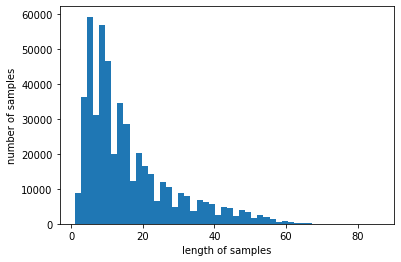

In [23]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [29]:
# 길이별 비율 체크
max_len = 45
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 45 이하인 샘플의 비율: 96.11188479416282


In [30]:
# 짧은 데이터는 0을 채우고, 최적길이를 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

# LSTM/GRU/BiLSTM 모델 훈련

In [31]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.layers import Embedding, Dense, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
# 임베딩 벡터의 차원은 100으로, 리뷰분류를 위해 LSTM 사용
# 왜 100인지는 모름
model_LSTM = Sequential()
model_LSTM.add(Embedding(vocab_size+2, 100))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(1, activation='sigmoid'))

In [33]:
model_GRU = Sequential()
model_GRU.add(Embedding(vocab_size+2, 100))
model_GRU.add(GRU(128))
model_GRU.add(Dense(1, activation='sigmoid'))

In [34]:
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(vocab_size+2, 100))
model_BiLSTM.add(Bidirectional(LSTM(128)))
model_BiLSTM.add(Dense(1, activation='sigmoid'))

In [35]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc_LSTM = ModelCheckpoint('RNN_LSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_GRU = ModelCheckpoint('RNN_GRU_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_BiLSTM = ModelCheckpoint('RNN_BiLSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [36]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [37]:
# LSTM모델 훈련
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_LSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_LSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3913/3913 [==============================] - 56s 14ms/step - loss: 0.3576 - acc: 0.8432 - auc: 0.9210 - auc_1: 0.9189 - recall: 0.8337 - precision: 0.8496 - true_positives: 162897.0000 - true_negatives: 166968.0000 - false_positives: 28842.0000 - false_negatives: 32495.0000 - val_loss: 0.3235 - val_acc: 0.8600 - val_auc: 0.9358 - val_auc_1: 0.9342 - val_recall: 0.8457 - val_precision: 0.8710 - val_true_positives: 41399.0000 - val_true_negatives: 42714.0000 - val_false_positives: 6133.0000 - val_false_negatives: 7555.0000

Epoch 00001: val_acc improved from -inf to 0.86004, saving model to RNN_LSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5
Epoch 2/15
3913/3913 [==============================] - 52s 13ms/step - loss: 0.3091 - acc: 0.8687 - auc: 0.9414 - auc_1: 0.9394 - recall: 0.8617 - precision: 0.8737 - true_positives: 168369.0000 - true_negatives: 171474.0000 - false_positives: 24336.0000 - false_negatives: 27023.0000 - val_loss: 0.3144 - val_acc: 0.8659 - val_auc: 0

In [38]:
# GRU모델 훈련
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_GRU.fit(X_total, y_total, epochs=15, callbacks=[es, mc_GRU], batch_size=100, validation_split=0.2)

Epoch 1/15
3913/3913 [==============================] - 52s 13ms/step - loss: 0.3557 - acc: 0.8442 - auc: 0.9259 - auc_1: 0.9237 - recall: 0.8439 - precision: 0.8526 - true_positives: 206196.0000 - true_negatives: 209023.0000 - false_positives: 35634.0000 - false_negatives: 38150.0000 - val_loss: 0.3393 - val_acc: 0.8521 - val_auc: 0.9366 - val_auc_1: 0.9346 - val_recall: 0.9088 - val_precision: 0.8166 - val_true_positives: 44487.0000 - val_true_negatives: 38853.0000 - val_false_positives: 9994.0000 - val_false_negatives: 4467.0000

Epoch 00001: val_acc improved from -inf to 0.85214, saving model to RNN_GRU_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5
Epoch 2/15
3913/3913 [==============================] - 48s 12ms/step - loss: 0.3068 - acc: 0.8698 - auc: 0.9423 - auc_1: 0.9403 - recall: 0.8633 - precision: 0.8744 - true_positives: 168687.0000 - true_negatives: 171589.0000 - false_positives: 24221.0000 - false_negatives: 26705.0000 - val_loss: 0.3246 - val_acc: 0.8634 - val_auc: 0.

In [39]:
# BiLSTM모델 훈련
model_BiLSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_BiLSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_BiLSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3913/3913 [==============================] - 70s 17ms/step - loss: 0.3583 - acc: 0.8430 - auc: 0.9246 - auc_1: 0.9218 - recall: 0.8445 - precision: 0.8505 - true_positives: 206341.0000 - true_negatives: 208395.0000 - false_positives: 36262.0000 - false_negatives: 38005.0000 - val_loss: 0.3237 - val_acc: 0.8603 - val_auc: 0.9367 - val_auc_1: 0.9352 - val_recall: 0.8262 - val_precision: 0.8870 - val_true_positives: 40444.0000 - val_true_negatives: 43694.0000 - val_false_positives: 5153.0000 - val_false_negatives: 8510.0000

Epoch 00001: val_acc improved from -inf to 0.86030, saving model to RNN_BiLSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5
Epoch 2/15
3913/3913 [==============================] - 66s 17ms/step - loss: 0.3093 - acc: 0.8688 - auc: 0.9413 - auc_1: 0.9393 - recall: 0.8615 - precision: 0.8740 - true_positives: 168336.0000 - true_negatives: 171546.0000 - false_positives: 24264.0000 - false_negatives: 27056.0000 - val_loss: 0.3124 - val_acc: 0.8682 - val_auc:

# LSTM/GRU/BiLSTM 모델 성능평가

In [45]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [46]:
# LSTM모델 성능 평가 
loaded_model = load_model('RNN_LSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n LSTM 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0193 - acc: 0.4673 - auc: 0.4948 - auc_1: 0.6941 - recall: 0.4244 - precision: 0.6980 - true_positives: 3164.0000 - true_negatives: 1802.0000 - false_positives: 1369.0000 - false_negatives: 4292.0000

 LSTM 테스트 결과: [1.0193334817886353, 0.46730026602745056, 0.49480295181274414, 0.694088339805603, 0.42435622215270996, 0.6979925036430359, 3164.0, 1802.0, 1369.0, 4292.0]


In [47]:
# GRU모델 성능 평가 
loaded_model = load_model('RNN_GRU_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU 테스트 결과:",result)

107/107 [==============================] - 2s 6ms/step - loss: 1.0473 - acc: 0.4750 - auc: 0.4989 - auc_1: 0.6963 - recall: 0.4366 - precision: 0.7026 - true_positives: 3255.0000 - true_negatives: 1793.0000 - false_positives: 1378.0000 - false_negatives: 4201.0000

 GRU 테스트 결과: [1.0473251342773438, 0.4750164747238159, 0.49885472655296326, 0.6962923407554626, 0.4365611672401428, 0.702568531036377, 3255.0, 1793.0, 1378.0, 4201.0]


In [48]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM 테스트 결과:",result)

107/107 [==============================] - 2s 8ms/step - loss: 1.0472 - acc: 0.4661 - auc: 0.4923 - auc_1: 0.6936 - recall: 0.4281 - precision: 0.6936 - true_positives: 3192.0000 - true_negatives: 1761.0000 - false_positives: 1410.0000 - false_negatives: 4264.0000

 BiLSTM 테스트 결과: [1.0471985340118408, 0.46607697010040283, 0.49226999282836914, 0.6935911178588867, 0.42811158299446106, 0.6936115026473999, 3192.0, 1761.0, 1410.0, 4264.0]
